___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [69]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from skimpy import clean_columns

sns.set_style("white")

#### Load Dataset

In [70]:
# reading dataset as df

df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")

#### Explore Data

You can rename columns to more usable, if you need.

In [71]:
# checking the head of df

df.head()

Gender  Age  Annual Income (k$)  Spending Score (1-100)
CustomerID                                                         
1             Male   19                  15                      39
2             Male   21                  15                      81
3           Female   20                  16                       6
4           Female   23                  16                      77
5           Female   31                  17                      40

In [72]:
# checking the summary information of df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [73]:
# Renaming columns in df

df.columns = ['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)']

In [74]:
df.head()

gender  age  annual_income(k$)  spending_score(1-100)
CustomerID                                                       
1             Male   19                 15                     39
2             Male   21                 15                     81
3           Female   20                 16                      6
4           Female   23                 16                     77
5           Female   31                 17                     40

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [75]:
# checking the null values in df

df.isnull().sum()

gender                   0
age                      0
annual_income(k$)        0
spending_score(1-100)    0
dtype: int64

In [76]:
# checking the duplicateds in df

df.duplicated().sum()

0

In [77]:
# checking the descriptive values in df

df.describe()

age  annual_income(k$)  spending_score(1-100)
count  200.000000         200.000000             200.000000
mean    38.850000          60.560000              50.200000
std     13.969007          26.264721              25.823522
min     18.000000          15.000000               1.000000
25%     28.750000          41.500000              34.750000
50%     36.000000          61.500000              50.000000
75%     49.000000          78.000000              73.000000
max     70.000000         137.000000              99.000000

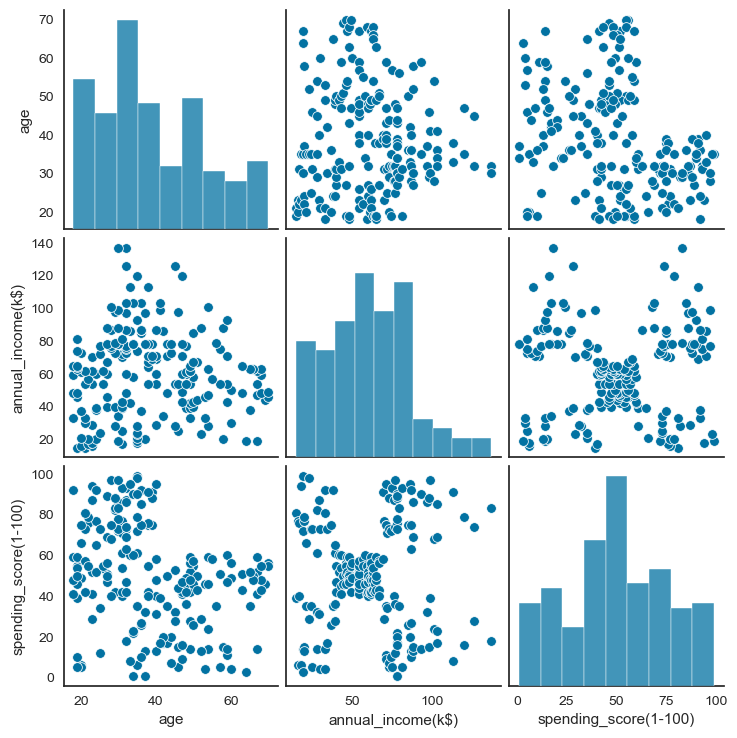

In [78]:
sns.pairplot(df)
plt.show()

In [79]:
df.columns

Index(['gender', 'age', 'annual_income(k$)', 'spending_score(1-100)'], dtype='object')

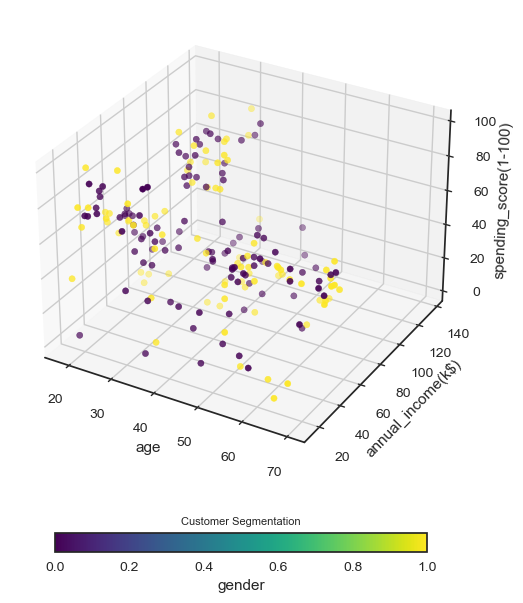

In [80]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['gender'].astype("category").cat.codes, cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

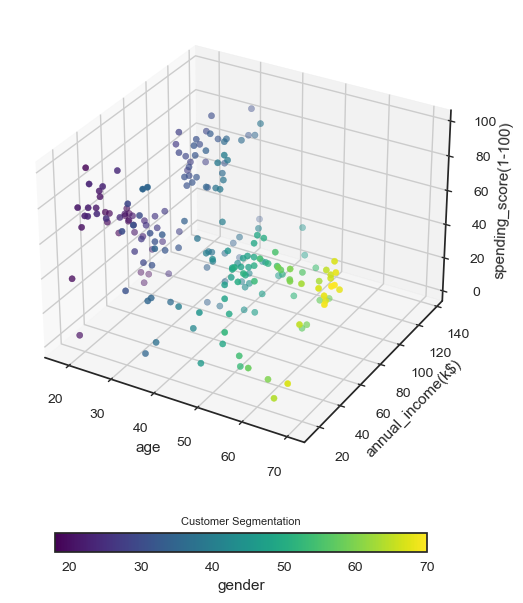

In [81]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['age'], df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('age')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

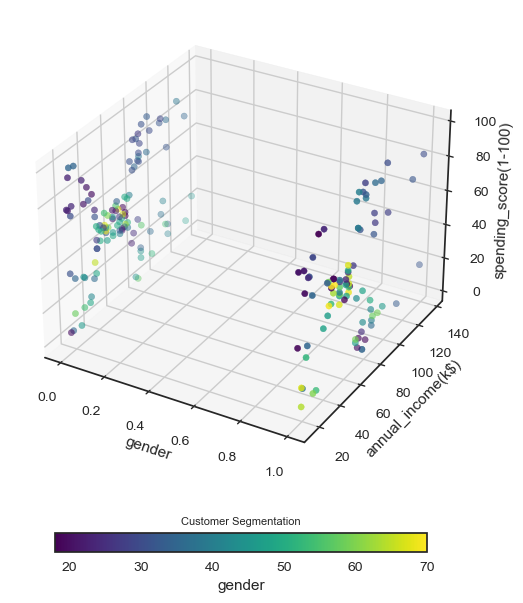

In [82]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(
    df['gender'].astype("category").cat.codes, df['annual_income(k$)'], df['spending_score(1-100)'], 
    c=df['age'], cmap='viridis',
    label='Customer Segmentation'
)
ax.set_xlabel('gender')
ax.set_ylabel('annual_income(k$)')
ax.set_zlabel('spending_score(1-100)')

cbar = fig.colorbar(
    ax.get_children()[0], ax=ax, 
    shrink=0.6, aspect=20, pad=0.1,
    label='gender',
    orientation="horizontal"
)
cbar.ax.set_title('Customer Segmentation', size=8)
plt.show()

In [83]:
# checking the correlation between features in df

df.corr()

age  annual_income(k$)  spending_score(1-100)
age                    1.000000          -0.012398              -0.327227
annual_income(k$)     -0.012398           1.000000               0.009903
spending_score(1-100) -0.327227           0.009903               1.000000

In [84]:
# checking the descriptive values of df by grouping gender

df.groupby("gender").describe().T

gender                           Female        Male
age                   count  112.000000   88.000000
                      mean    38.098214   39.806818
                      std     12.644095   15.514812
                      min     18.000000   18.000000
                      25%     29.000000   27.750000
                      50%     35.000000   37.000000
                      75%     47.500000   50.500000
                      max     68.000000   70.000000
annual_income(k$)     count  112.000000   88.000000
                      mean    59.250000   62.227273
                      std     26.011952   26.638373
                      min     16.000000   15.000000
                      25%     39.750000   45.500000
                      50%     60.000000   62.500000
                      75%     77.250000   78.000000
                      max    126.000000  137.000000
spending_score(1-100) count  112.000000   88.000000
                      mean    51.526786   48.511364
                      std     24.114950   27.896770
                      min      5.000000    1.000000
                      25%     35.000000   24.500000
                      50%     50.000000   50.000000
                      75%     73.000000   70.000000
                      max     99.000000   97.000000

In [85]:
# checking the correlation between features in df by grouping gender

df.groupby("gender").corr()

age  annual_income(k$)  \
gender                                                      
Female age                    1.000000           0.059912   
       annual_income(k$)      0.059912           1.000000   
       spending_score(1-100) -0.375439           0.047542   
Male   age                    1.000000          -0.092978   
       annual_income(k$)     -0.092978           1.000000   
       spending_score(1-100) -0.279628          -0.023684   

                              spending_score(1-100)  
gender                                               
Female age                                -0.375439  
       annual_income(k$)                   0.047542  
       spending_score(1-100)               1.000000  
Male   age                                -0.279628  
       annual_income(k$)                  -0.023684  
       spending_score(1-100)               1.000000

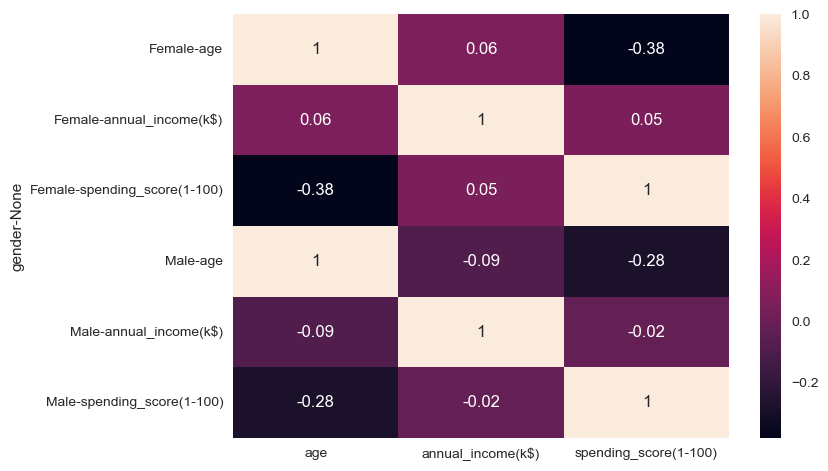

In [86]:
# heatmap for correlation between features in df by grouping gender

sns.heatmap(df.groupby("gender").corr().round(2), annot=True)
plt.show()

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

## KMeans Clustering

### Clustering based on Age and Spending Score

#### Create a new dataset with two variables

In [87]:
# make a copy of df

df1 = df.copy()

In [88]:
# define X containing only age and spending score features

X = df.iloc[:, [1,3]]

In [89]:
X

age  spending_score(1-100)
CustomerID                            
1            19                     39
2            21                     81
3            20                      6
4            23                     77
5            31                     40
...         ...                    ...
196          35                     79
197          45                     28
198          32                     74
199          32                     18
200          30                     83

[200 rows x 2 columns]

#### Hopkins method for clustering tendency

In [90]:
# import hopkins function to find clustering tendency of X

from pyclustertend import hopkins

In [91]:
# finding hopkins score of X

hopkins(X, X.shape[0])

0.29278669551604597

#### Determine optimal number of clusters

In [92]:
# Elbow method using age and spending score variabels to find optimal cluster number 

inertia = []  #ssd
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss(within cluster sum of square) for that model
    inertia.append(kmeans.inertia_)

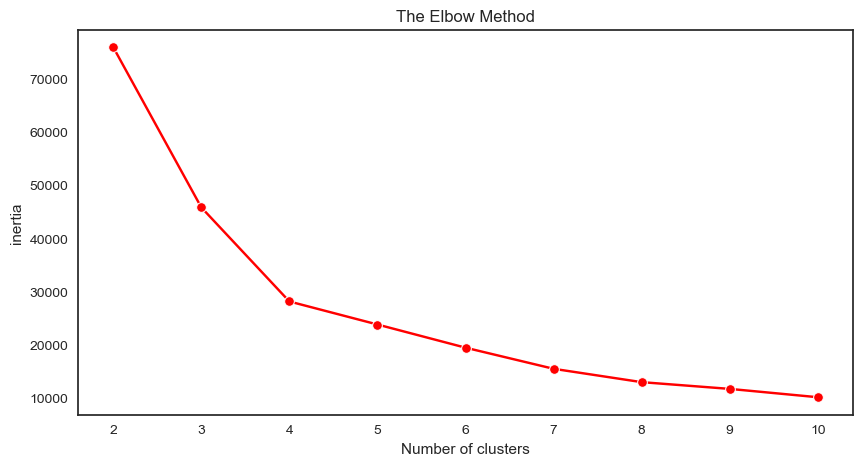

In [93]:
# Elbow method graph using age and spending score variables

plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [94]:
# finding differences of inertia for each cluster

K = range(2,11)  # cluster number
pd.Series(inertia, index = K).diff(-1)

2     30108.479394
3     17675.093049
4      4327.334745
5      4355.130911
6      3968.924776
7      2507.709506
8      1268.463332
9      1564.980819
10             NaN
dtype: float64

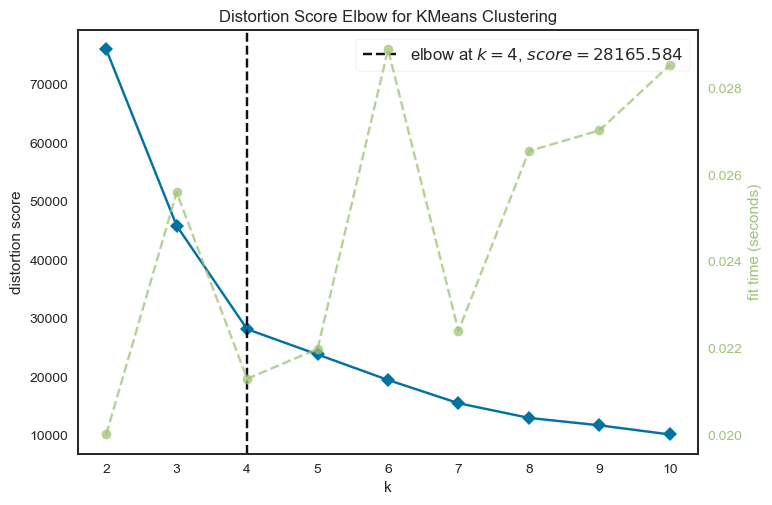

In [95]:
# Yellowbrick Elbow method to find optimal number

from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

#### Apply K Means with optimal cluster number

In [96]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=4, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([3, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 3, 1, 2, 3, 2,
       1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 3,
       1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 3, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 2, 3, 2, 0, 2, 1, 2, 1, 2,
       3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [97]:
# checking the silhouette score

silhouette_score(X, kmeans.labels_)  # cluster number is 4

0.49973941540141753

In [98]:
# silhouette_scores for different k values

for k in K:
    # intialise kmeans
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={k}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116
For n_clusters=10, the silhouette score is 0.4141899863508767


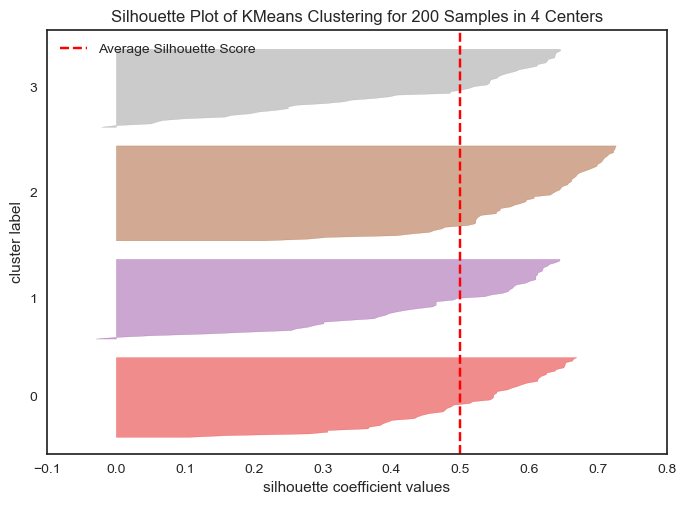

In [99]:
# silhouette score plots for each cluster for 4 clusters

from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

kmeans = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(kmeans)

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof();

#### Visualizing and Labeling All the Clusters

In [100]:
kmeans.cluster_centers_

array([[55.70833333, 48.22916667],
       [43.29166667, 15.02083333],
       [30.1754386 , 82.35087719],
       [27.61702128, 49.14893617]])

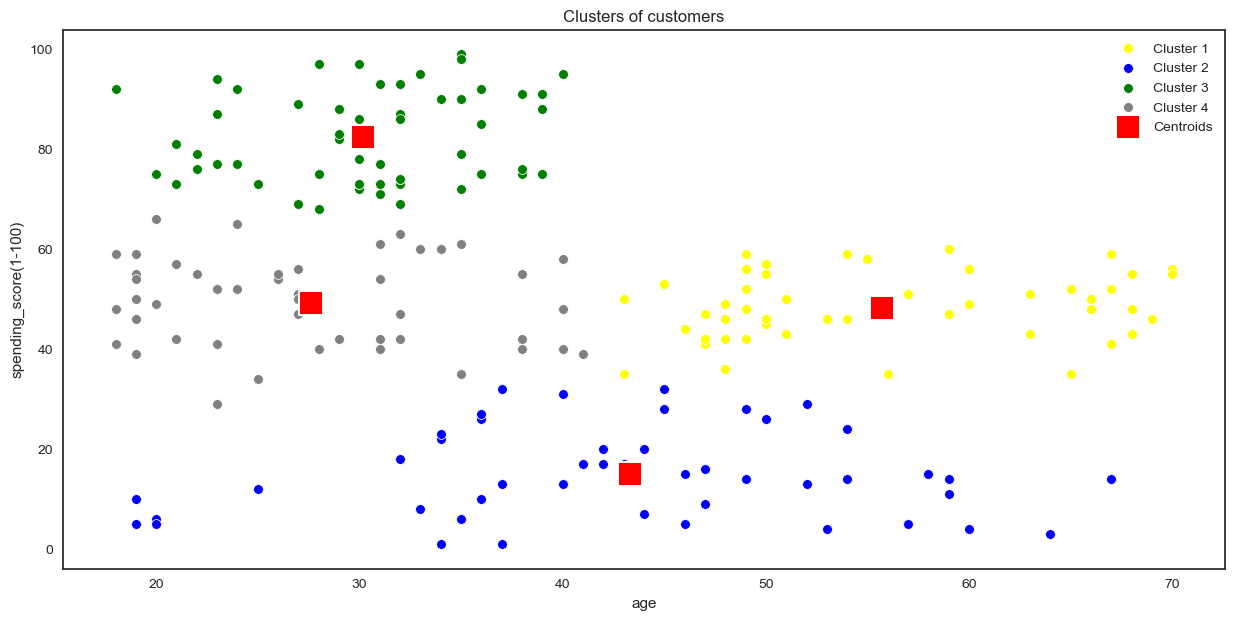

In [101]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(X.iloc[y_pred == 0, 0], X.iloc[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X.iloc[y_pred == 1, 0], X.iloc[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X.iloc[y_pred == 2, 0], X.iloc[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X.iloc[y_pred == 3, 0], X.iloc[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('age')
plt.ylabel('spending_score(1-100)')
plt.legend()
plt.show()

### Clustering based on Annual Income and Spending Score

#### Create a new dataset with two variables

In [102]:
X =df.iloc[:, [2,3]]
X

annual_income(k$)  spending_score(1-100)
CustomerID                                          
1                          15                     39
2                          15                     81
3                          16                      6
4                          16                     77
5                          17                     40
...                       ...                    ...
196                       120                     79
197                       126                     28
198                       126                     74
199                       137                     18
200                       137                     83

[200 rows x 2 columns]

#### Hopkins method for clustering tendency

In [103]:
hopkins(X, X.shape[0])

0.31474383476719053

#### Determine optimal number of clusters

In [104]:
# Elbow method using age and spending score variables to find optimal cluster number

inertia = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss(ssd) for that model
    inertia.append(kmeans.inertia_)

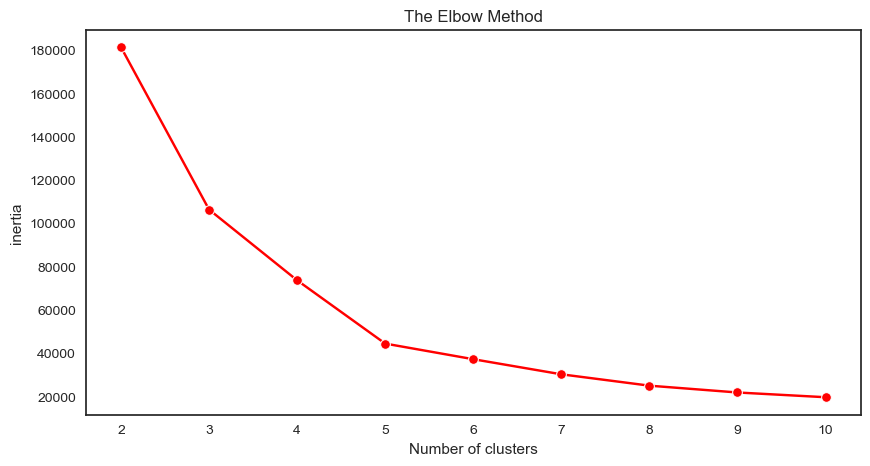

In [105]:
# Elbow method using age and spending score variables

plt.figure(figsize=(10,5))
sns.lineplot(range(2, 11), inertia, marker='o', color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertia')
plt.show()

In [106]:
# finding differences of inertia for each cluster

pd.Series(inertia, index=K).diff(-1)

2     75015.222897
3     32668.584023
4     29231.333592
5      7214.640937
6      6974.157303
7      5247.817858
8      3149.746677
9      2190.019823
10             NaN
dtype: float64

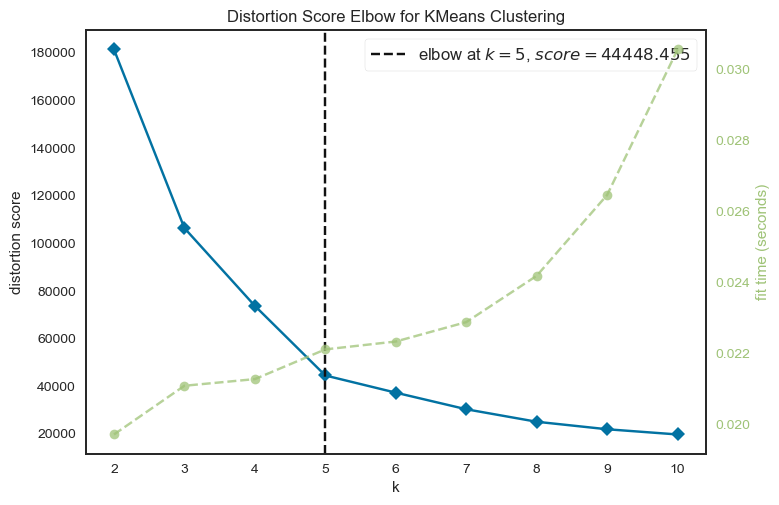

In [107]:
# Yellowbrick Elbow method to find optimal number

from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,11))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();
# score: (default- distortion )(mean of sum squared distances to centers.)

#### Apply K Means with optimal cluster number

In [108]:
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [109]:
silhouette_score(X, kmeans.labels_)  # for cluster number 5

0.553931997444648

In [110]:
# silhouette_scores for different k values

range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    # intialise kmeans
    model = KMeans(n_clusters=num_clusters, random_state=42)
    model.fit(X)
    cluster_labels = model.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.2968969162503008
For n_clusters=3, the silhouette score is 0.46761358158775435
For n_clusters=4, the silhouette score is 0.4931963109249047
For n_clusters=5, the silhouette score is 0.553931997444648
For n_clusters=6, the silhouette score is 0.53976103063432
For n_clusters=7, the silhouette score is 0.5264283703685728
For n_clusters=8, the silhouette score is 0.45827056882053113
For n_clusters=9, the silhouette score is 0.4553729779390266
For n_clusters=10, the silhouette score is 0.45925273534781125


#### Visualizing and Labeling All the Clusters

In [111]:
X["cluster_1"] = y_pred

In [112]:
X

annual_income(k$)  spending_score(1-100)  cluster_1
CustomerID                                                     
1                          15                     39          2
2                          15                     81          3
3                          16                      6          2
4                          16                     77          3
5                          17                     40          2
...                       ...                    ...        ...
196                       120                     79          4
197                       126                     28          1
198                       126                     74          4
199                       137                     18          1
200                       137                     83          4

[200 rows x 3 columns]

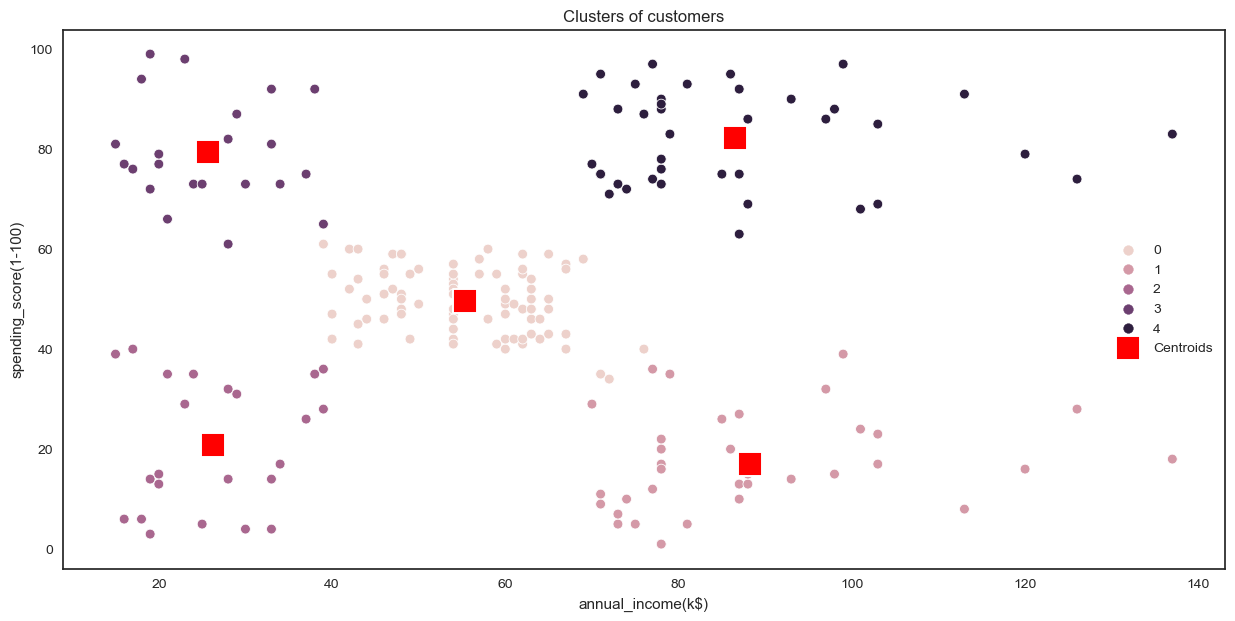

In [113]:
# Visualising the clusters
plt.figure(figsize=(15,7))
sns.scatterplot(data=X, x="annual_income(k$)", y="spending_score(1-100)", hue = 'cluster_1', s=50)

sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('annual_income(k$)')
plt.ylabel('spending_score(1-100)')
plt.legend()
plt.show()

 **According to the analysis above, we can label the customers as follows:**
 
 0 : medium_income_medium_spent
 
 1 : high_income_low_spent
 
 2 : low_income_low_spent
 
 3 : low_income_high_spent
 
 4 : high_income_high_spent

In [119]:
df["labels"] = kmeans.labels_

In [120]:
df

gender  age  annual_income(k$)  spending_score(1-100)  labels
CustomerID                                                               
1             Male   19                 15                     39       2
2             Male   21                 15                     81       3
3           Female   20                 16                      6       2
4           Female   23                 16                     77       3
5           Female   31                 17                     40       2
...            ...  ...                ...                    ...     ...
196         Female   35                120                     79       4
197         Female   45                126                     28       1
198           Male   32                126                     74       4
199           Male   32                137                     18       1
200           Male   30                137                     83       4

[200 rows x 5 columns]

In [121]:
# changing the cluster numbers with customer labels defined above

df["labels"] = df.labels.map({0:"medium_income_medium_spent",
                          1:"high_income_low_spent",
                          2:"low_income_low_spent",
                          3:"low_income_high_spent",
                          4:"high_income_high_spent"})
df

gender  age  annual_income(k$)  spending_score(1-100)  \
CustomerID                                                          
1             Male   19                 15                     39   
2             Male   21                 15                     81   
3           Female   20                 16                      6   
4           Female   23                 16                     77   
5           Female   31                 17                     40   
...            ...  ...                ...                    ...   
196         Female   35                120                     79   
197         Female   45                126                     28   
198           Male   32                126                     74   
199           Male   32                137                     18   
200           Male   30                137                     83   

                            labels  
CustomerID                          
1             low_income_low_spent  
2            low_income_high_spent  
3             low_income_low_spent  
4            low_income_high_spent  
5             low_income_low_spent  
...                            ...  
196         high_income_high_spent  
197          high_income_low_spent  
198         high_income_high_spent  
199          high_income_low_spent  
200         high_income_high_spent  

[200 rows x 5 columns]

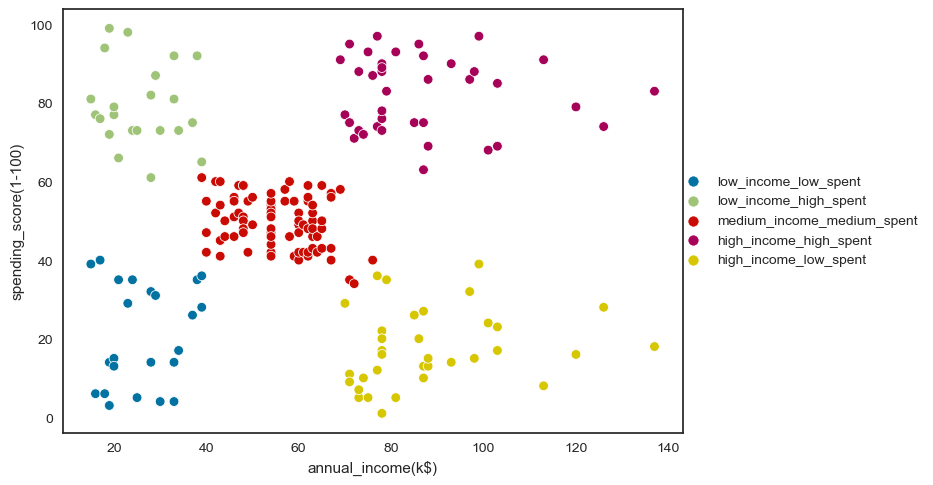

In [123]:
sns.scatterplot(data= df, x="annual_income(k$)", y="spending_score(1-100)", hue="labels")
plt.legend(loc="center right", bbox_to_anchor=(1.4, 0.5))
plt.show()

In [124]:
# finding mean values of features for each customer labels

clus_pred = df.groupby("labels").mean().T
clus_pred

labels                 high_income_high_spent  high_income_low_spent  \
age                                 32.692308              41.114286   
annual_income(k$)                   86.538462              88.200000   
spending_score(1-100)               82.128205              17.114286   

labels                 low_income_high_spent  low_income_low_spent  \
age                                25.272727             45.217391   
annual_income(k$)                  25.727273             26.304348   
spending_score(1-100)              79.363636             20.913043   

labels                 medium_income_medium_spent  
age                                     42.716049  
annual_income(k$)                       55.296296  
spending_score(1-100)                   49.518519

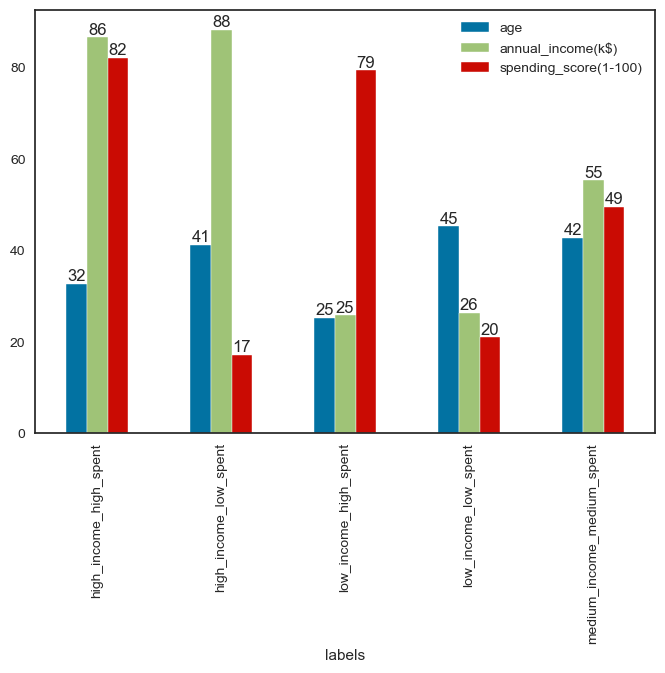

In [157]:
ax = df.groupby("labels")[["age","annual_income(k$)","spending_score(1-100)"]].mean().plot(kind="bar")
for p in ax.containers :
    ax.bar_label(p, fmt="%d")
plt.show()

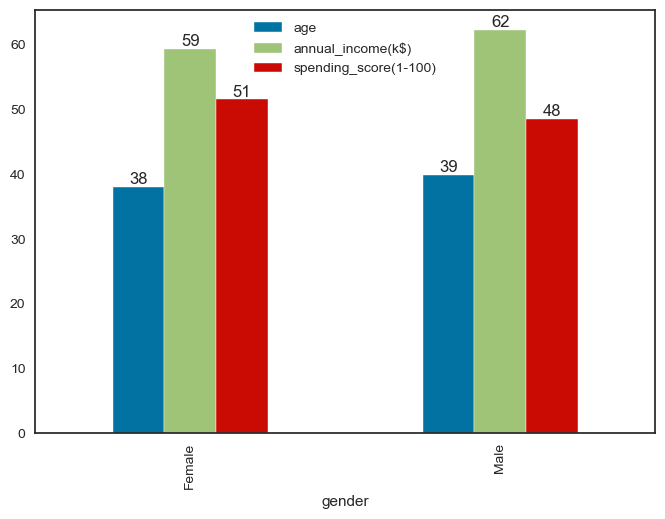

In [159]:
ax=df.groupby("gender")[["age","annual_income(k$)","spending_score(1-100)"]].mean().plot(kind="bar")
for p in ax.containers :
    ax.bar_label(p, fmt="%d")
plt.show()

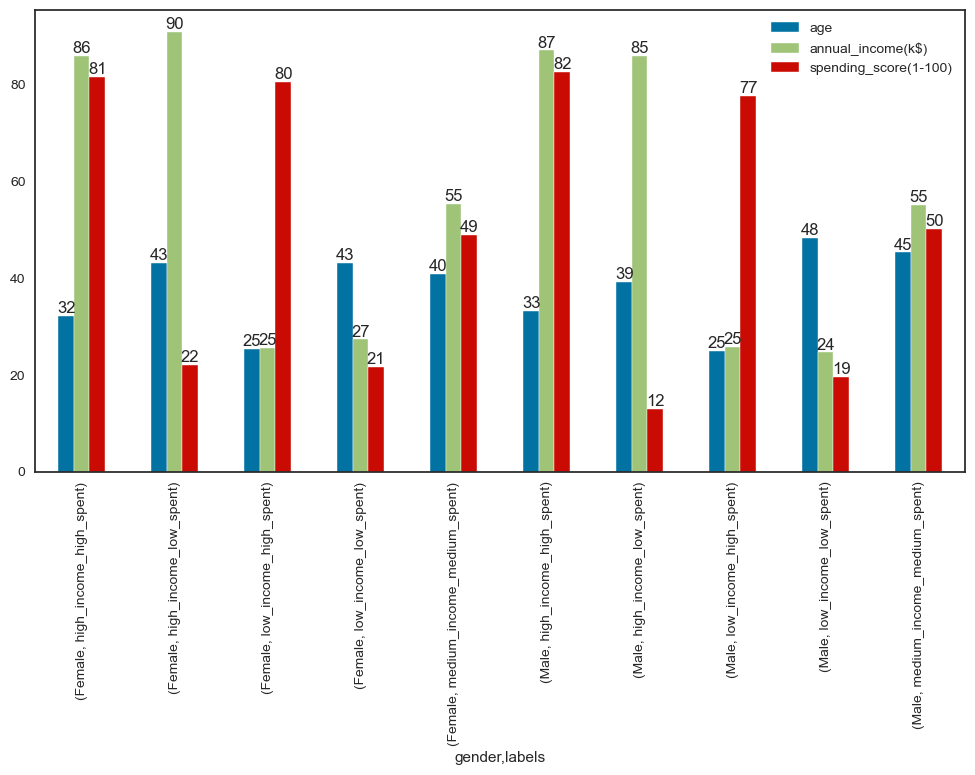

In [162]:
ax = df.groupby(["gender", "labels"])[["age","annual_income(k$)","spending_score(1-100)"]].mean().plot(kind="bar", figsize=(12,6))
for p in ax.containers :
    ax.bar_label(p, fmt="%d")
plt.show()

## Hierarchical Clustering (Agglomerative)

### Determine optimal number of clusters using Dendogram

#### Clustering based on Age and Spending Score- x1

In [164]:
# import dendrogram and linkage functions for hierarchical clustering

from scipy.cluster.hierarchy import dendrogram, linkage

In [166]:
# defining a datframe contains only age and spending score features

X1 =df.iloc[:, [1,3]]
X1

age  spending_score(1-100)
CustomerID                            
1            19                     39
2            21                     81
3            20                      6
4            23                     77
5            31                     40
...         ...                    ...
196          35                     79
197          45                     28
198          32                     74
199          32                     18
200          30                     83

[200 rows x 2 columns]

In [167]:
# finding different linkage parameters for different linkage methods

hc_ward = linkage(y = X1, method = "ward")
hc_complete = linkage(X1, "complete") 
hc_average = linkage(X1, "average")
hc_single = linkage(X1, "single")

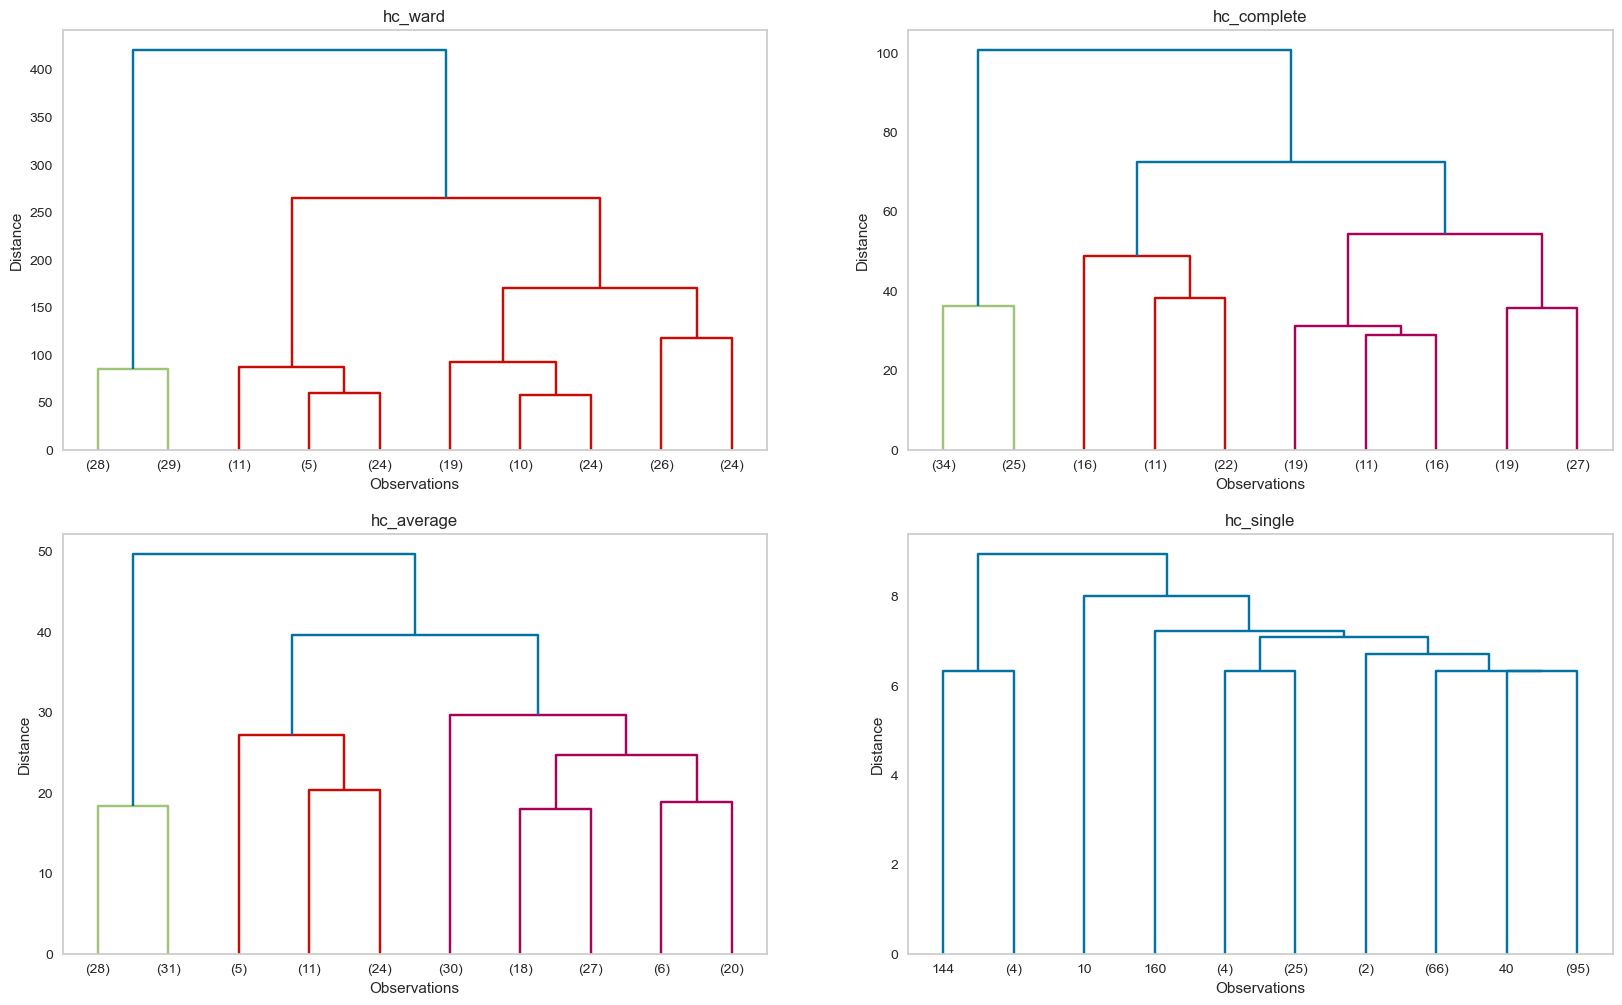

In [168]:
# dendrogram of X1 for different linkage methods

%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    # truncate_mode='lastp', p=10(10 küme gösterir)
    dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)

#### Clustering based on Annual Income and Spending Score- x2

In [170]:
# defining a datframe contains only annual income and spending score features

X2 =df.iloc[:, [2,3]]
X2

annual_income(k$)  spending_score(1-100)
CustomerID                                          
1                          15                     39
2                          15                     81
3                          16                      6
4                          16                     77
5                          17                     40
...                       ...                    ...
196                       120                     79
197                       126                     28
198                       126                     74
199                       137                     18
200                       137                     83

[200 rows x 2 columns]

In [171]:
# finding linkage parameters of X2 for different linkage methods

hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete") 
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

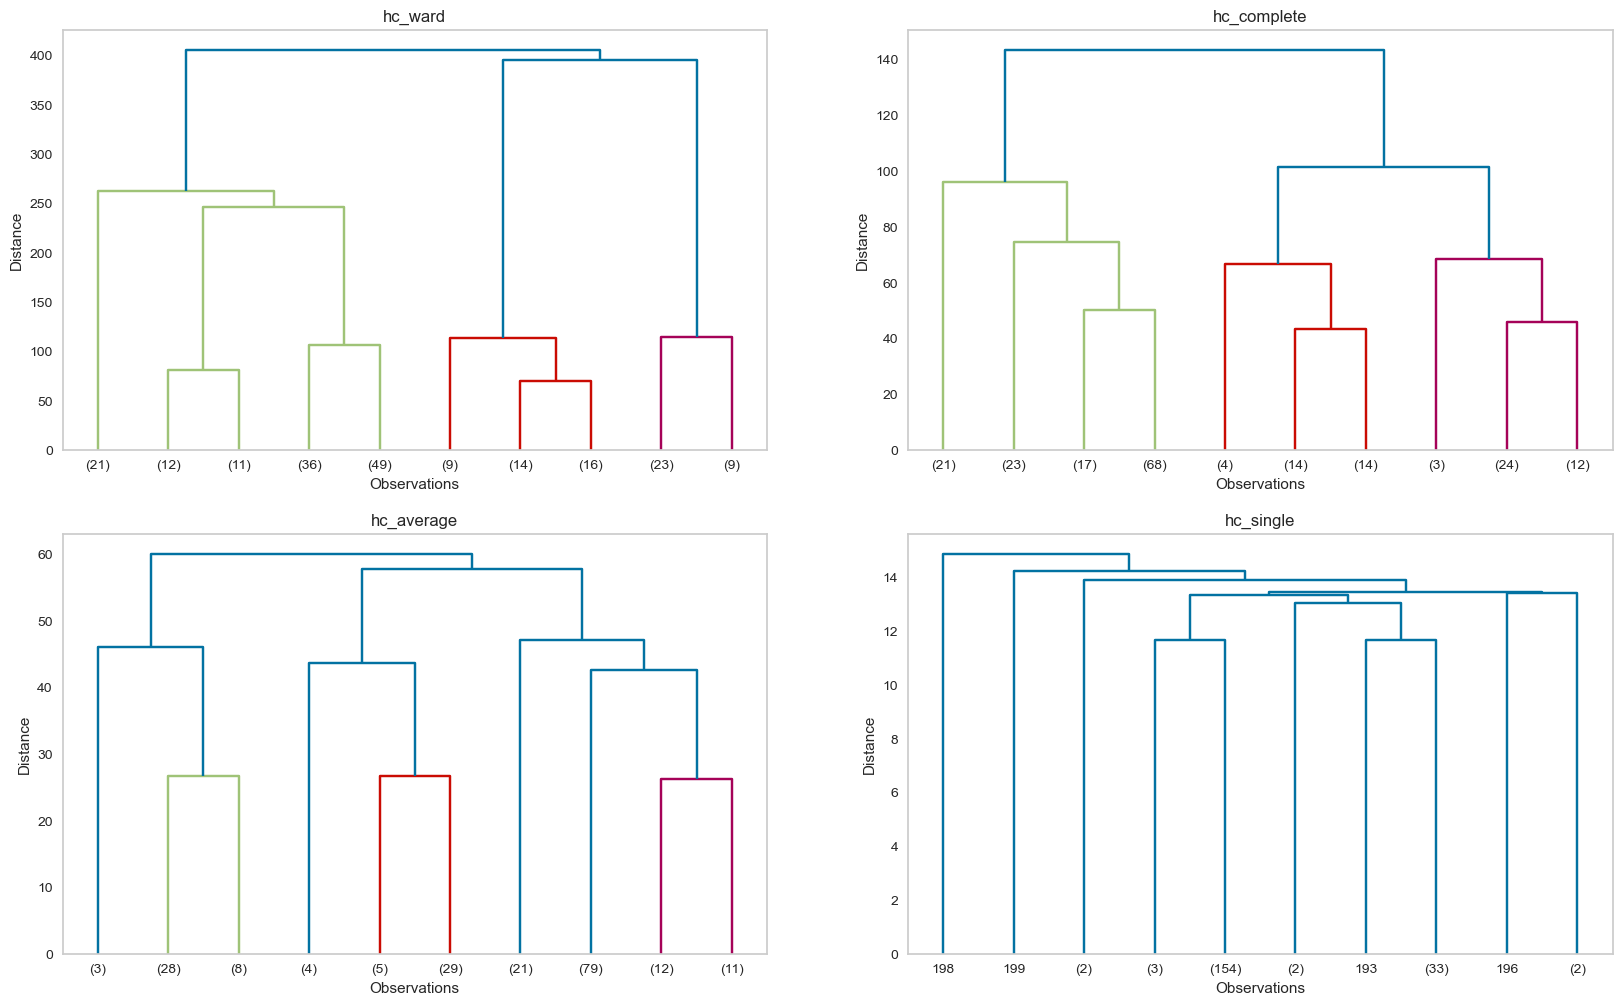

In [172]:
# dendrogram of X2 for different linkage methods

%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,12))

scorelist = ['hc_ward', 'hc_complete', 'hc_average', 'hc_single']
for i, col in enumerate([hc_ward, hc_complete, hc_average, hc_single]):
    plt.subplot(2, 2, i+1) 
    plt.title(f'{scorelist[i]}')
    plt.xlabel("Observations")
    plt.ylabel("Distance")
    dendrogram(col, leaf_font_size=10, truncate_mode='lastp', p=10)

### Apply Agglomerative Clustering

#### Age and Spending Score- x1

In [175]:
# built Applomerative clustering model for age and spending score features

from sklearn.cluster import AgglomerativeClustering

In [176]:
# checking silhouette scores of X1 for different cluster numbers

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X1)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X1, model.labels_)}')

Silhouette Score for 2 clusters: 0.4549465643222241
Silhouette Score for 3 clusters: 0.4411791686353356
Silhouette Score for 4 clusters: 0.4602496389565028
Silhouette Score for 5 clusters: 0.40374071753059787
Silhouette Score for 6 clusters: 0.4125958704145705
Silhouette Score for 7 clusters: 0.4158977524079244
Silhouette Score for 8 clusters: 0.3883688959732531
Silhouette Score for 9 clusters: 0.3948151533262091


In [177]:
# built the model with 4 cluster and fit_predict on X1

model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

#### Annual Income and Spending Score- x2

In [178]:
# checking silhouette scores of X2 for different cluster numbers

K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [179]:
# built the model with 5 cluster and fit_predict on X2

model2 = AgglomerativeClustering(n_clusters=5, affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [180]:
df["label1"] = model1.labels_

In [181]:
df

gender  age  annual_income(k$)  spending_score(1-100)  \
CustomerID                                                          
1             Male   19                 15                     39   
2             Male   21                 15                     81   
3           Female   20                 16                      6   
4           Female   23                 16                     77   
5           Female   31                 17                     40   
...            ...  ...                ...                    ...   
196         Female   35                120                     79   
197         Female   45                126                     28   
198           Male   32                126                     74   
199           Male   32                137                     18   
200           Male   30                137                     83   

                            labels  label1  
CustomerID                                  
1             low_income_low_spent       0  
2            low_income_high_spent       3  
3             low_income_low_spent       2  
4            low_income_high_spent       3  
5             low_income_low_spent       0  
...                            ...     ...  
196         high_income_high_spent       3  
197          high_income_low_spent       0  
198         high_income_high_spent       3  
199          high_income_low_spent       2  
200         high_income_high_spent       3  

[200 rows x 6 columns]

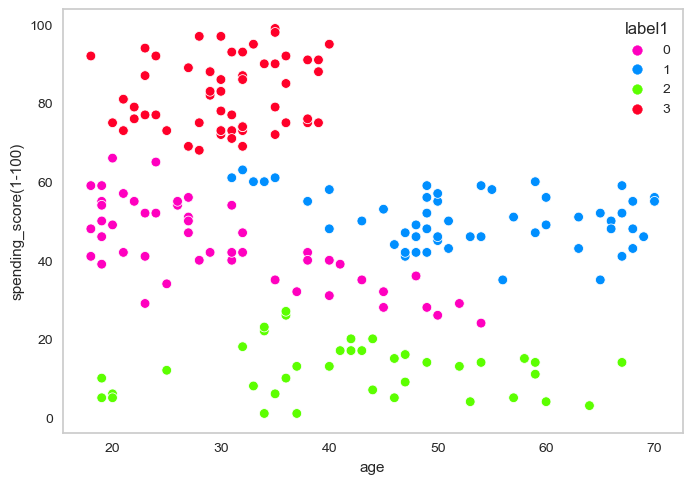

In [189]:
# scatter plot of age and spending score for label1

sns.scatterplot(data= df, x="age", y="spending_score(1-100)", hue="label1", palette="gist_rainbow_r")
plt.show()

In [191]:
# finding mean values of df by goruping label1

clus_pred1 = df.drop(columns="labels").groupby("label1").mean().T
clus_pred1

label1                     0          1       2          3
age                    30.52  53.169811  42.650  30.175439
annual_income(k$)      55.76  54.207547  67.125  66.070175
spending_score(1-100)  43.62  50.452830  12.275  82.350877

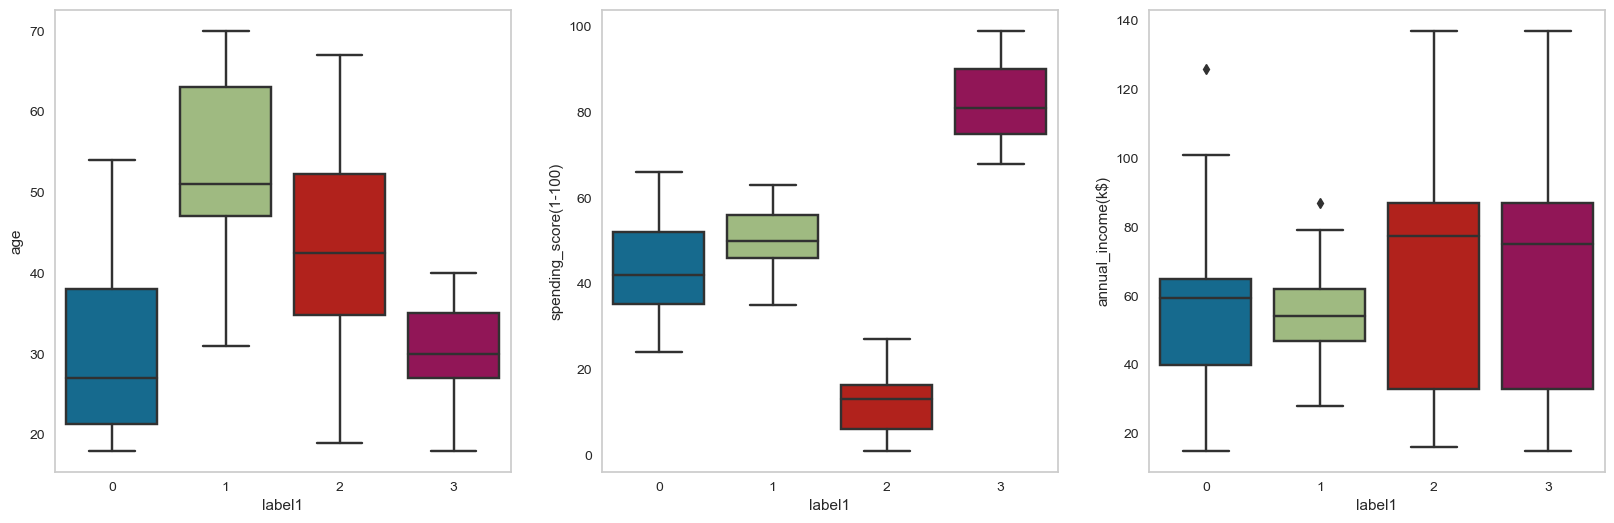

In [199]:
# boxplots of age, spending score and annual income features for different label1

%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,6))

columns = ["age", "spending_score(1-100)", "annual_income(k$)"]
for i, col in enumerate(columns):
    plt.subplot(1, 3, i+1) 
    sns.boxplot(y = col, x = "label1", data = df)

#### Annual Income and Spending Score- x2

In [200]:
df["label2"] = model2.labels_

In [201]:
df

gender  age  annual_income(k$)  spending_score(1-100)  \
CustomerID                                                          
1             Male   19                 15                     39   
2             Male   21                 15                     81   
3           Female   20                 16                      6   
4           Female   23                 16                     77   
5           Female   31                 17                     40   
...            ...  ...                ...                    ...   
196         Female   35                120                     79   
197         Female   45                126                     28   
198           Male   32                126                     74   
199           Male   32                137                     18   
200           Male   30                137                     83   

                            labels  label1  label2  
CustomerID                                          
1             low_income_low_spent       0       4  
2            low_income_high_spent       3       3  
3             low_income_low_spent       2       4  
4            low_income_high_spent       3       3  
5             low_income_low_spent       0       4  
...                            ...     ...     ...  
196         high_income_high_spent       3       2  
197          high_income_low_spent       0       0  
198         high_income_high_spent       3       2  
199          high_income_low_spent       2       0  
200         high_income_high_spent       3       2  

[200 rows x 7 columns]

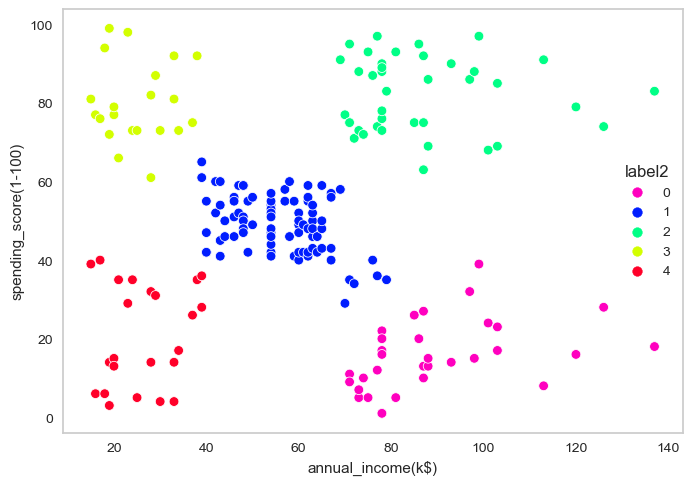

In [203]:
# scatter plot of annual income and spending score for label2

sns.scatterplot(data= df, x="annual_income(k$)", y="spending_score(1-100)", hue="label2", palette = "gist_rainbow_r" )
plt.show()

In [204]:
# finding mean values of df by goruping label2

clus_pred2 = df.groupby("label2").mean().T
clus_pred2

label2                        0          1          2          3          4
age                    41.00000  42.482353  32.692308  25.333333  45.217391
annual_income(k$)      89.40625  55.811765  86.538462  25.095238  26.304348
spending_score(1-100)  15.59375  49.129412  82.128205  80.047619  20.913043
label1                  1.68750   0.588235   2.948718   2.761905   1.173913

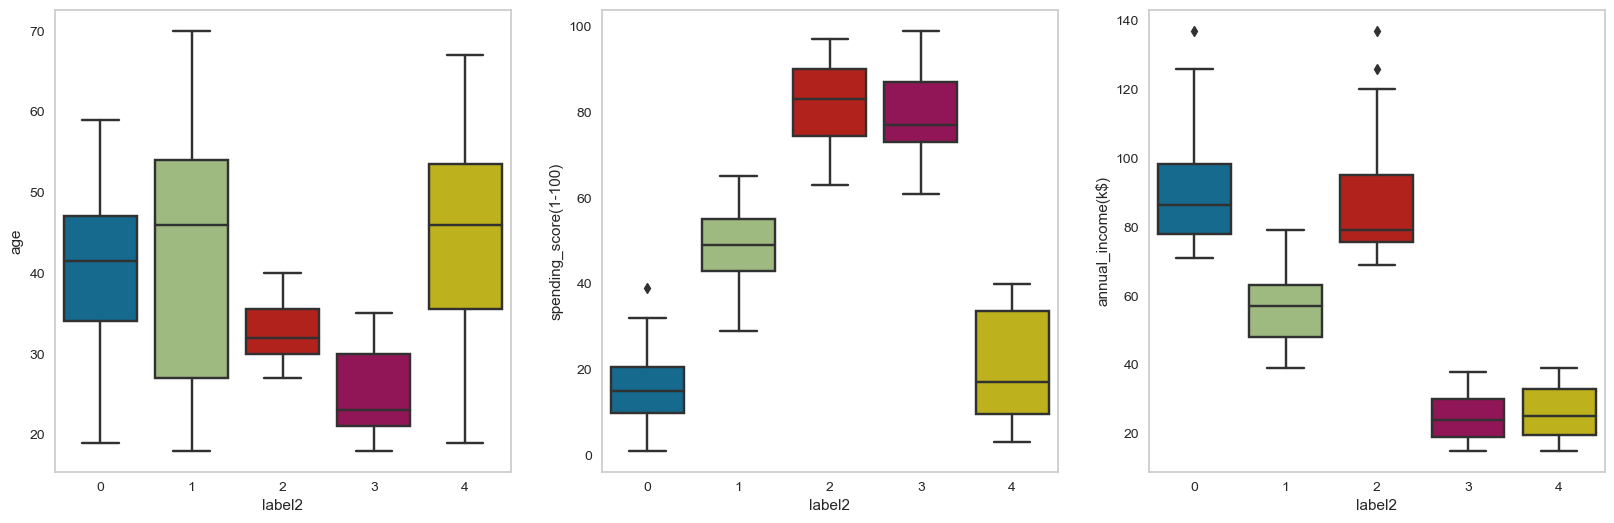

In [205]:
# boxplots of age, spending score and annual income features for different label2

%matplotlib inline
sns.set_style("whitegrid", {'axes.grid' : False})
plt.figure(figsize = (20,6))

columns = ["age", "spending_score(1-100)", "annual_income(k$)"]
for i, col in enumerate(columns):
    plt.subplot(1, 3, i+1) 
    sns.boxplot(y = col, x = "label2", data = df)

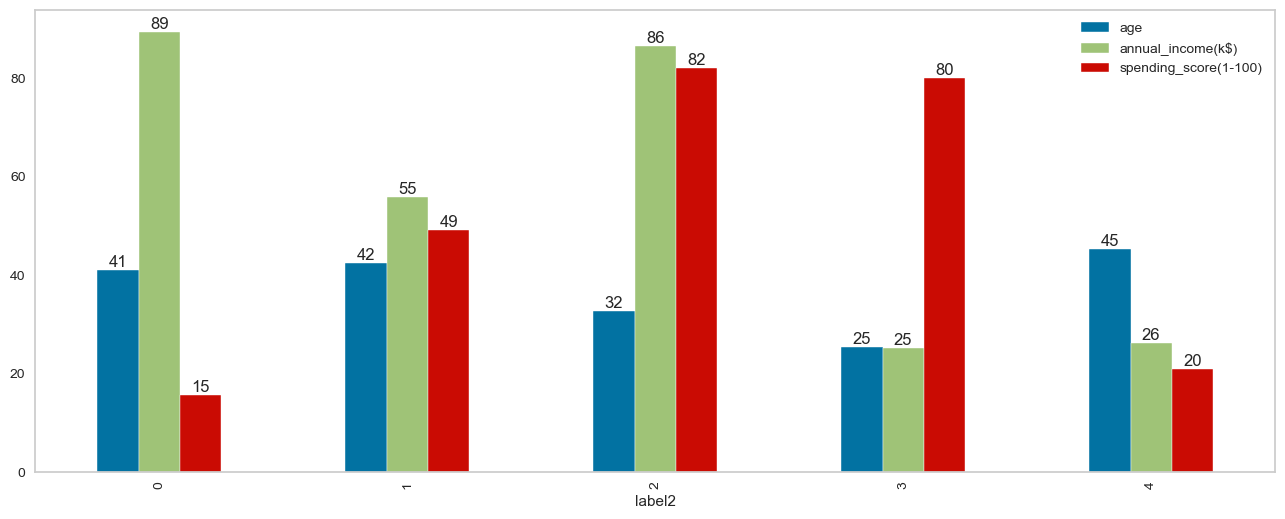

In [212]:
ax = df.drop(columns=["labels","label1"]).groupby("label2").mean().plot(kind='bar', figsize = (16,6))
for p in ax.containers:
    ax.bar_label(p, fmt="%d")

**As a result from analysis above we can label customers as given below:**

0 : high_income_low_spent

1 : medium_income_medium_spent

2 : high_income_high_spent

3 : low_income_high_spent

4 : low_income_low_spent

## Conclusion

In this project, data related with customers whose purchasing history obtained from the membership cards of a big mall was analyesed to make a customer segmentation.

After performing exploratory data analysis, observing the distribution of customers according to different variables and also investigating the relationships between different variables, KMeans and Hierarchical Clustering analysis were applied to data. In this analysis different features were used. Firstly age and spending score features, secondly annual income and spending score features were used for customer segmentation analysis using KMeans and Hierarchical models respectively. 

As a result of the analysis the best customer segmentation was obtained using annual income and spending score features and customers was labeled as follows:

0 : high_income_low_spent

1 : medium_income_medium_spent

2 : high_income_high_spent

3 : low_income_high_spent

4 : low_income_low_spent

When we compared the average values of age, annual income and spending score features it was concluded that:

* We should apply special promotions to retain our high-income and high-spending customers.
* We should focus on gaining customers having high-income but low-spent by applying special strategies.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___